# Introduction to CS6475 Computational Photography
---
This notebook introduces some key aspects of the numpy and OpenCV APIs as they relate to image manipulation. These techniques are building blocks that can be used extensively throughout the course. There are no deliverables for this **optional** exercise, but you are free to discuss on the forums, and the material covered may appear on the final exam.

You should complete Parts 1-3 by reading through the notebook and executing each code cell (you can use the keyboard shortcut `shift + enter` to execute cells). After completing the tutorial, you can check your understanding by using what you've learned to complete a series of challenges where you are asked to implement some more complex functions like automatic contrast adjustment for color images and writing your own Canny edge detector. You are **not** required to complete the challenges, but they are designed to help prepare you for later topics in the course.

## Lesson Summary
---
  - [Part 1 - Image I/O](#Part-1---Image-I/O) -- introduce basic file I/O in OpenCV
  - [Part 2 - Image Objects](#Part-2:-Image-Objects) -- explore the API available on images
  - [Part 3 - Image Manipulation](#Part-3:-Image-Manipulation) -- demonstrate fundamental image manipulation operators
  - [Part 4 - Challenges](#Part-4:-Challenges) -- apply what you've learned

In [2]:
import cv2
import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt

# Use jupyter "magic" methods to dynamically reload external modules every
# time any block is run, and show images inline in the notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

---
## Part 1 - Image I/O
---
**Key Questions:**
  - What happens when the name of the image file doesn't exist? Does OpenCV raise an error? What value does the variable take?
  - What happens if you don't specify a file extension when writing an image file to disk?
  - What is the default color space for images in OpenCV?

### 1.1 Read & display a grayscale image
---
**Example:** Read & display a sample image.

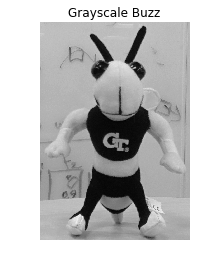

In [9]:
gray_img = cv2.imread("example.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap="gray"); plt.axis("off"); plt.title("Grayscale Buzz");

In [44]:
import numpy as np
img = np.zeros((4, 4))
img[:] = 4
assert(img[0, 0] == 4)

### 1.2 Read & display a color image
---
**Example:** Read & display a sample image in color

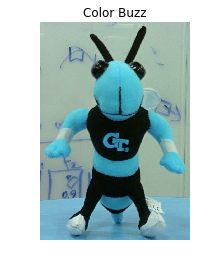

In [4]:
color_img = cv2.imread("example.png", cv2.IMREAD_COLOR)
plt.imshow(color_img); plt.axis("off"); plt.title("Color Buzz");

Something doesn't look right about that picture though. The color seems wrong -- buzz should be **yellow**, not blue. The `imshow()` function expects images to be in [Red, Green, Blue] (i.e., **RGB**) color space, but OpenCV uses [Blue, Green, Red] order.

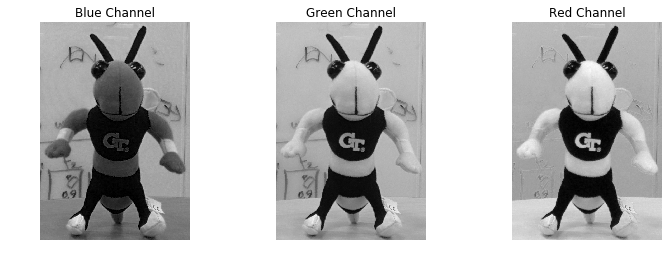

In [5]:
# modify array shape from (row, col, channel) --> (channel, row, col) and use python multiple-assignment semantics
# to extract the color channels; `channels` is an array, while `blue`, `green`, and `red` each hold one channel
channels = blue, green, red = np.rollaxis(color_img, 2)
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(channels[0], cmap="gray"); plt.axis("off"); plt.title("Blue Channel");
plt.subplot(132); plt.imshow(channels[1], cmap="gray"); plt.axis("off"); plt.title("Green Channel");
plt.subplot(133); plt.imshow(channels[2], cmap="gray"); plt.axis("off"); plt.title("Red Channel");

### 1.3 Read & display a color image (correctly this time)
---
  - Use the cv2.cvtColor function for simplicity, or to apply more complex color space transformations (BGR2RGB, RGB2GRAY, YCrCv, HSV, etc.)

**See Also:** [cv2.cvtColor()](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html), [np.hstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [np.vstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html), [np.dstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dstack.html)

**Example:** Correct the color channel order of an image and display it.

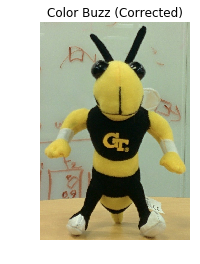

In [6]:
rgb_img = np.dstack([red, green, blue])  # recombine the color channels (there are more efficient ways than this)
# rgb_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # same as above
plt.imshow(rgb_img); plt.axis("off"); plt.title("Color Buzz (Corrected)");

### 1. 4 Save an image to disk
---
OpenCV infers the encoding from the filename extension; you can use jpg, jpeg, bmp, png, tif, and tiff.

**See Also:** [cv2.imwrite()](http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#imwrite)

**Example:** Save each of the three color channels as grayscale images.

In [12]:
cv2.imwrite("blue.png", blue)
cv2.imwrite("green.png", green)
cv2.imwrite("red.png", red)

True

---
## Part 2: Image Objects
---
In this section we will demonstrate the API for image objects. When finished, you should be able to answer the following questions:

**Key Questions:**
  - What is the type of image objects read with OpenCV? What is the default "dtype" of images?
  - What kind of operations can be performed on images?
  - What is "broadcasting"?
  - What is overflow/underflow?

In [13]:
img = cv2.imread("example.png", cv2.IMREAD_GRAYSCALE)  # reload the sample image

### 2.1 Type Information & Basic Attributes
---

Images are stored as [multidimensional arrays](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html). By default, pixels are treated as [unsigned 8-bit integers](https://docs.scipy.org/doc/numpy/user/basics.types.html) with a range of [0-255]. The array objects have tons of useful attributes and methods, and you will almost always get better performance from built-in functions than writing your own.

In [14]:
# Show the type information for an array
print "Image type:", type(img)
print "Pixels are represented by unsigned 8-bit values:", img.dtype

Image type: <type 'numpy.ndarray'>
Pixels are represented by unsigned 8-bit values: uint8


In [15]:
# Example ndarray object properties
img_dims = img.ndim
img_shape = img.shape
img_size = img.size

print "\n{:^70}".format("NDARRAY ATTRIBUTES")
print "{:^70}\n".format("====================")
print "{:^30}{:^20}{:^20}".format("Description", "Example", "Value")
print "{:^30}{:^20}{:^20}".format("-------------", "---------", "-------")
print "{:^30}{:^20}{:^20}".format("Number of dimensions", "img.ndim", img_dims)
print "{:^30}{:^20}{:^20}".format("Image Shape", "img.shape", img_shape)
print "{:^30}{:^20}{:^20}".format("Pixel count", "img.size", img_size)


                          NDARRAY ATTRIBUTES                          

         Description                Example              Value        
        -------------              ---------            -------       
     Number of dimensions           img.ndim               2          
         Image Shape               img.shape          (1043, 718)     
         Pixel count                img.size             748874       


### 2.2 Basic Array Indexing & Slicing
---
Numpy arrays support both basic and "advanced" [indexing & slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html). There are terse statements to get each row, column, element, or rectangular subarrays.

#### 2.2.1 Basic Indexing
  - `ndarrays` can be treated just like multidimensional arrays. `img[i][j]` returns the element in row i, column j. Additional array dimensions follow the same pattern, e.g., `img[i][j][k]` for 3d arrays.

**Example:** Get the pixel value at row 37, column 73

In [16]:
img[37][73]

185

#### 2.2.2 Better Indexing

  - Although you _can_ use multiple slices for each axis, it is better to combine the indices to a single slice; using multiple slices incurs the overhead of parsing the indexes for every pair of brackets.

**Example:** Get the same pixel as 2.2.1

In [17]:
img[37, 73]

185

#### 2.2.3 Indexing a subarray

  - `ndarray` indexes support array slice syntax `start:end:step` for each axis.

**Example:** Grab a 3x4 region from the top-right corner of the sample image (the first 3 rows, last 4 columns)

In [18]:
img[0:3, img.shape[1]-4:img.shape[1]]

array([[179, 178, 175, 174],
       [177, 177, 175, 174],
       [178, 178, 178, 177]], dtype=uint8)

#### 2.2.4 Advanced slicing

  - Slice indices can be simplified by omitting leading 0 if the slice starts from the beginning of that dimension, it can ommit the last index if the slice ends at the end of that dimension, and it supports positive and negative indexing.

**Example:** Simplify the example from 2.2.3

In [19]:
img[:3, -4:]

array([[179, 178, 175, 174],
       [177, 177, 175, 174],
       [178, 178, 178, 177]], dtype=uint8)

  - The `:` symbol means "all" for a particular axis.

**Example:** Grab the first row or first column of the sample image

In [20]:
print "Original img.shape:", img.shape
print "Shape of the first column of pixels (all rows, column 0): ", img[:, 0].shape
print "Shape of the first row of pixels (row 0, all columns): ", img[0, :].shape

Original img.shape: (1043, 718)
Shape of the first column of pixels (all rows, column 0):  (1043,)
Shape of the first row of pixels (row 0, all columns):  (718,)


### 2.3 "Advanced" Indexing
---
Advanced slicing & indexing makes these arrays incredibly powerful, and allows writing fast, concise code. The speed comes from leveraging the compiled C extensions of the Numpy library instead of pure Python. The same syntax used for basic indexing can be used to select arbitrary elements by coordinates, with boolean indexing, or by linear index.

#### 2.3.1 Specifying a list of coordinates

  - You can pass a list of coordinates for each element you want to extract. (Note that this returns a 1-d array of elements.)

**See also:** [np.where()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html), [np.argwhere()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html)

**Example:** Grab pixels at even rows and odd columns

In [21]:
# Index arrays
rows = [0, 2, 4, 6, 8]
cols = [1, 3, 5, 7, 9]
print "rows =", rows
print "cols =", cols
print "img[rows, cols]: ", img[rows, cols]

rows = [0, 2, 4, 6, 8]
cols = [1, 3, 5, 7, 9]
img[rows, cols]:  [187 187 189 188 184]


#### 2.3.2 Using a boolean mask

  - You can pass in an array of the same shape (subject to broadcasting rules) where each element that is True in the mask will appear in the output. (Note that this returns a 1-d array of elements.)
  
**Example:** Get the pixel intensities from the first 3 rows and 4 columns in the sample image

In [22]:
mask = np.zeros(img.shape, dtype=bool)
mask[:3, :4] = True
img[mask]

array([184, 187, 185, 185, 185, 186, 186, 186, 185, 185, 187, 187], dtype=uint8)

  - You can also construct a boolean array from an expression (following array broadcasting rules) to use as an index. (Note that this returns a 1-d array.)
  
**Example:** Find all the pixels in the sample image with an intensity >230

In [23]:
img[img > 230]

array([234, 233, 231, 236, 232, 232, 231, 232, 232, 231, 232, 236, 233,
       238, 231, 232, 249, 239, 242, 238, 232, 243, 235, 242, 234, 231,
       233, 232, 232, 231, 233, 239, 233, 231, 232, 235, 231, 231, 238,
       231, 232, 234, 233, 233, 237, 231, 231, 232, 232, 234, 231, 232,
       232, 232, 235, 236, 232, 233, 235, 235, 232, 233, 232, 235, 232,
       232, 232, 234, 232, 232, 232, 233, 232, 231, 231, 231, 232, 231,
       232, 231, 234, 231, 231, 231, 232, 232, 234, 235, 232, 233, 235,
       233, 232, 231, 233, 233, 240, 231, 232, 232, 232, 234, 231, 231], dtype=uint8)

### 2.4 Array methods
---
[`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) objects have many convenient methods & properties (see docs for list). Many of these methods accept optional keyword arguments `axis` and/or `dtype` that change the accumulator type and allow the operation to be perfomed along each row or column instead of the entire matrix.

#### 2.4.1 Basic methods

**Example:** Get the minimum, maximum, mean, and sum of all values in an array.

In [24]:
print "Minimum pixel intensity:", img.min()
print "Maximum pixel intensity:", img.max()
print "Mean pixel intensity:", img.mean()
print "Cumulative pixel intensity:", img.sum()

Minimum pixel intensity: 0
Maximum pixel intensity: 249
Mean pixel intensity: 144.836151342
Cumulative pixel intensity: 108464028


**Example:** Use the `axis` and `dtype` keyword arguments to find the maximum sum of any column.

In [25]:
print "maximum column sum:", img.sum(axis=0, dtype=float).max()

maximum column sum: 182981.0


#### 2.4.2 Advanced array manipulation - Type Casting

**See Also:** [numpy data types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

**Example:** Use numpy utility functions to change the array data type.

In [26]:
# Convert from uint8 -> float64, use .astype()
img64 = img.astype(np.float64)
print "old dtype:", img.dtype
print "new dtype:", img64.dtype

old dtype: uint8
new dtype: float64


#### 2.4.3 Advanced array manipulation - Changing Array Shape

**See Also:** [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html), [np.atleast_2d()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.atleast_2d.html), [np.atleast_3d()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.atleast_3d.html), [np.ravel()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html), [np.rollaxis()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.rollaxis.html), [np.swapaxes()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.swapaxes.html), [np.newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis)

**Example:** Use numpy utility functions to change the array data type.

In [27]:
img3d = np.atleast_3d(img)  # equivalent to img[:, :, np.newaxis]
print "old shape:", img.shape
print "new shape:", img3d.shape

old shape: (1043, 718)
new shape: (1043, 718, 1)


### 2.5 Arithmetic & Broadcasting
---
Python supports operator overloading, so ndarrays perform element-wise arithmetic using the `+ - * /` operators. These operators also support ["broadcasting"](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), which allows extraordinary flexibility when used properly. Here is a great resource on broadcasting: http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc

> The basic broadcasting rule is that two arrays are compatible if the dimension of the trailing axes of both arrays match, or if one of them is one.

In [28]:
color_img = cv2.imread("example.png", cv2.IMREAD_COLOR)  # reload the sample image

#### 2.5.1 Arithmetic Overflow & Underflow

Images are treated just like arrays, so they support all the "usual" arithmetic operations. But representing pixel values with fixed-width precision data types creates precision errors. By default, pixels are uint8's that are limited to the range [0-255], so things break when values from a calculation fall outside that range.

**Example:** Use the color channels of the image to experiment with the sum, product, and difference of arrays.

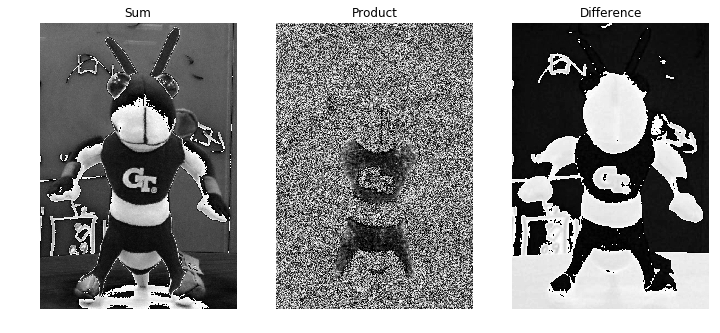

In [29]:
bluePlusGreen = color_img[:, :, 0] + color_img[:, :, 1]
redTimesBlue = color_img[:, :, 2] * color_img[:, :, 0]
greenMinusRed = color_img[:, :, 1] - color_img[:, :, 2]

plt.figure(figsize=(12, 6))
plt.subplot(131); plt.imshow(bluePlusGreen, cmap="gray"); plt.axis("off"); plt.title("Sum");
plt.subplot(132); plt.imshow(redTimesBlue, cmap="gray"); plt.axis("off"); plt.title("Product");
plt.subplot(133); plt.imshow(greenMinusRed, cmap="gray"); plt.axis("off"); plt.title("Difference");

#### 2.5.2 Typecasting
The good news is that in most cases you can fix the problem by simply casting the image dtype to higher precision.

OpenCV also offers functions for most arithmetic operations (e.g., cv2.add, cv2.addWeighted, etc.), and it is worth noting that numpy and OpenCV do not handle overflow the same way. OpenCV clamps at the min and max value for the precision (128 + 128 == min(128 + 128, 255)); numpy operators wrap (128 + 128 == (128 + 128) % 256).


**Example:** Fix the previous example by casting the values to 64-bit floats first.

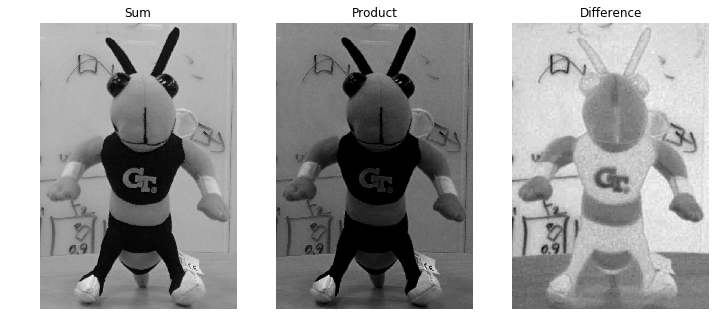

In [30]:
_img = color_img.astype(float)
bluePlusGreen = _img[:, :, 0] + _img[:, :, 1]
redTimesBlue = _img[:, :, 2] * _img[:, :, 0]
greenMinusRed = _img[:, :, 1] - _img[:, :, 2]

plt.figure(figsize=(12, 6))
plt.subplot(131); plt.imshow(bluePlusGreen, cmap="gray"); plt.axis("off"); plt.title("Sum");
plt.subplot(132); plt.imshow(redTimesBlue, cmap="gray"); plt.axis("off"); plt.title("Product");
plt.subplot(133); plt.imshow(greenMinusRed, cmap="gray"); plt.axis("off"); plt.title("Difference");

---
## Part 3: Image Manipulation
---
**Key Questions:**
  - What is the difference between `np.diff`, `np.gradient`, and `cv2.Sobel`?
  - What is the relationship between aliasing and interpolation?
  - What is the relationship between image border padding and "boundary condition"?

In [31]:
img = cv2.imread("example.png", cv2.IMREAD_GRAYSCALE)  # reload the sample image

### 3.1 Basic Manipulation
---
**Example:** Transpose and flip an image.

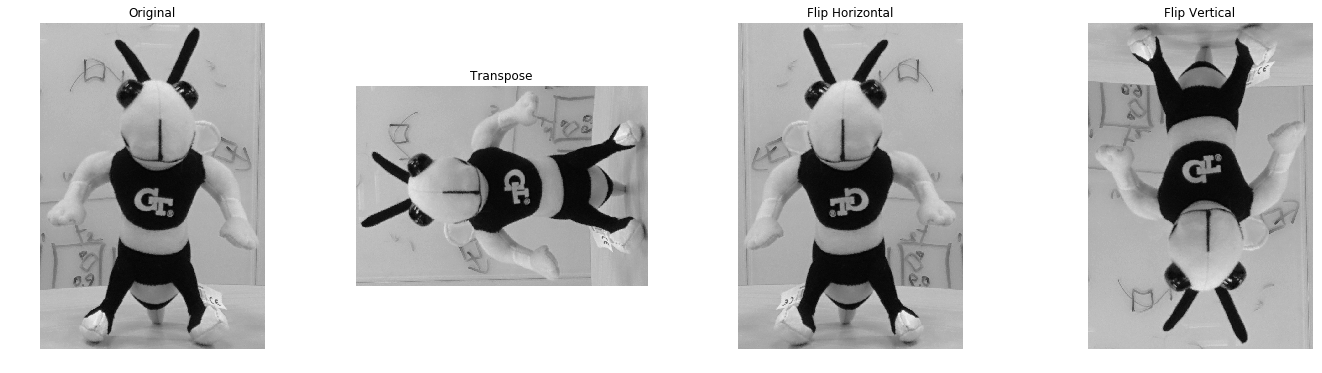

In [32]:
plt.figure(figsize=(24, 6));
plt.subplot(141); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(142); plt.imshow(img.T, cmap="gray"); plt.axis("off"); plt.title("Transpose");
plt.subplot(143); plt.imshow(np.fliplr(img), cmap="gray"); plt.axis("off"); plt.title("Flip Horizontal");
plt.subplot(144); plt.imshow(np.flipud(img), cmap="gray"); plt.axis("off"); plt.title("Flip Vertical");

#### 3.1.1 Image resizing (subsampling)

The simplest method of reducing an image size is by subsampling -- dropping rows and columns until the desired scale is reached.

**Example:** Compare array slicing and linear interpolation to subsample an image to 1/10 scale.

Original size: (1043, 718)
Reduced size: (105, 72)


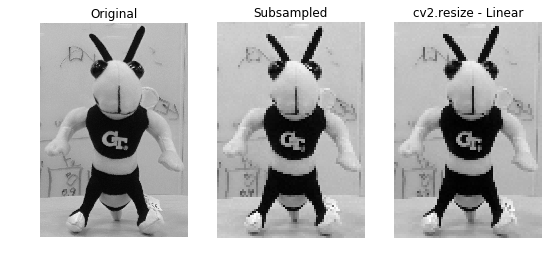

In [33]:
sub_img = img[::10, ::10]
res_img = cv2.resize(img, sub_img.shape[::-1])
plt.figure(figsize=(9, 4));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(sub_img, cmap="gray"); plt.axis("off"); plt.title("Subsampled");
plt.subplot(133); plt.imshow(res_img, cmap="gray"); plt.axis("off"); plt.title("cv2.resize - Linear");
print "Original size:", img.shape
print "Reduced size:", sub_img.shape

#### 3.1.2 Image resizing (interpolating)

The jagged edges in the subsampled image are an artifact called "aliasing". It can be mitigated by smoothing (blurring) the image before subsampling, or (generally) by changing the interpolation method. The `cv2.resize` function has several interpolation methods (linear, cubic, etc.).

**Example:** Use cv2.resize to avoid aliasing while downsampling

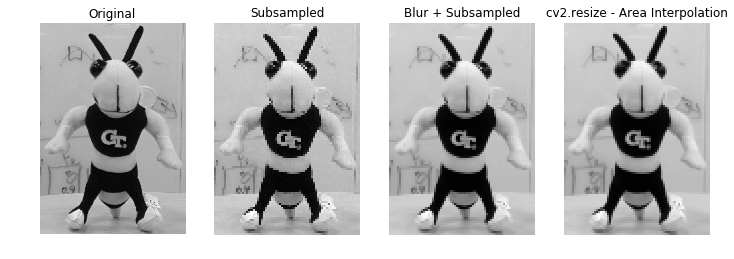

In [34]:
bs_img = cv2.GaussianBlur(img, ksize=(13, 13), sigmaX=2.5)[::10, ::10]
interp_img = cv2.resize(img, sub_img.shape[::-1], interpolation=cv2.INTER_AREA)
plt.figure(figsize=(12, 4));
plt.subplot(141); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(142); plt.imshow(sub_img, cmap="gray"); plt.axis("off"); plt.title("Subsampled");
plt.subplot(143); plt.imshow(bs_img, cmap="gray"); plt.axis("off"); plt.title("Blur + Subsampled");
plt.subplot(144); plt.imshow(interp_img, cmap="gray"); plt.axis("off"); plt.title("cv2.resize - Area Interpolation");

### 3.2 Image Gradients
---

**See Also:** [np.diff()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html), [np.gradient()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html), [cv2.Sobel()](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#sobel), [cv2.Scharr()](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#scharr)

#### 3.2.1 Simple finite difference approximation

**Example:** Calculate the first spatial derivative of an image along using finite differences.

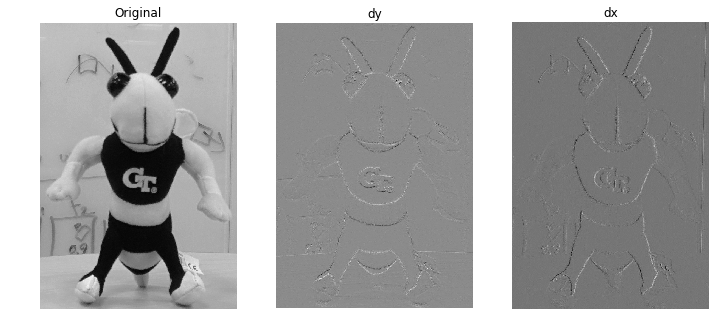

In [35]:
dy = np.diff(img.astype(float), axis=0)  # dy
dx = np.diff(img.astype(float), axis=1)  # dx
plt.figure(figsize=(12, 6));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(dy, cmap="gray"); plt.axis("off"); plt.title("dy");
plt.subplot(133); plt.imshow(dx, cmap="gray"); plt.axis("off"); plt.title("dx");

#### 3.2.2 Central finite difference approximation
**Example:** Calculate the first spatial derivative of an image using the central differences approximation

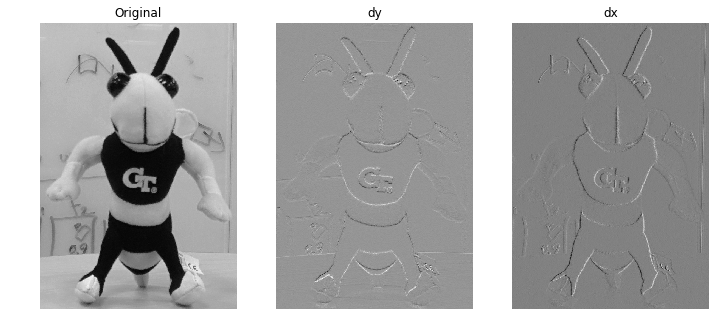

In [36]:
dy, dx = np.gradient(img.astype(float))
plt.figure(figsize=(12, 6));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(dy, cmap="gray"); plt.axis("off"); plt.title("dy");
plt.subplot(133); plt.imshow(dx, cmap="gray"); plt.axis("off"); plt.title("dx");

#### 3.2.3 Sobel derivative approximation
**Example:** Calculate the first spatial derivative of an image using the Sobel operator

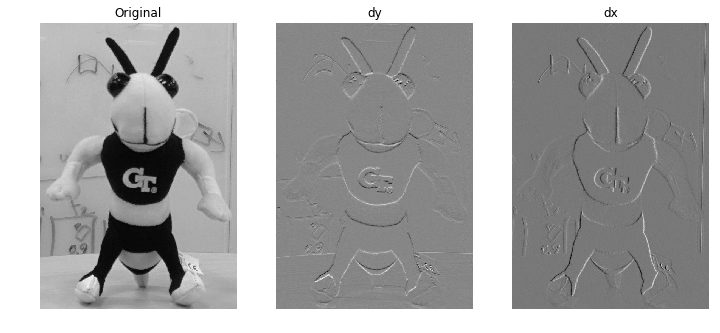

In [37]:
dy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
dx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
plt.figure(figsize=(12, 6));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(dy, cmap="gray"); plt.axis("off"); plt.title("dy");
plt.subplot(133); plt.imshow(dx, cmap="gray"); plt.axis("off"); plt.title("dx");

### 3.3 Border Padding
---

Pixel-level operations on images often require special-case handling near the image borders ("edge cases" -- _pun intended_). For example, when calculating the gradient near the edges `np.diff` uses forward finite differences which just shrinks the appropriate dimension by one, while `np.gradient` pads the border and uses a second order central difference approximation to keep the input and output shape the same. Both approaches are _valid_ in the right circumstances, but it illustrates the issue of applying appropriate padding before operating on an image.

**See Also:** [np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html#numpy.pad), [cv2.copyMakeBorder](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#copymakeborder)

Note: `np.pad()` is significantly more flexible than `cv2.copyMakeBorder`, but it is also significantly _slower_.

**Example:** Expand an image with `cv2.BORDER_CONSTANT`, `cv2.BORDER_REFLECT`, and `cv2.BORDER_REFLECT_101` edges.

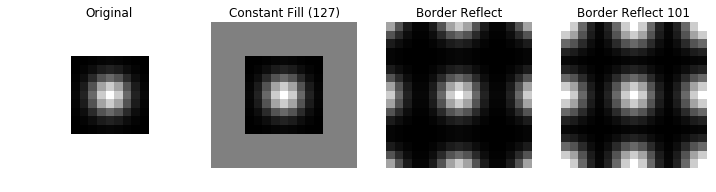

In [38]:
# generate a test image
vals = cv2.getGaussianKernel(9, 1.5)
img = (cv2.normalize(vals * np.rollaxis(vals, 1), alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)).astype(np.uint8)

# make a copy of the original that shares the same scale as the outputs -- the white border
# will not appear in the jupyter notebook
_img = cv2.copyMakeBorder(img, 4, 4, 4, 4, borderType=cv2.BORDER_CONSTANT, value=255)

#  
zPadded = cv2.copyMakeBorder(img, 4, 4, 4, 4, borderType=cv2.BORDER_CONSTANT, value=127)
rPadded = cv2.copyMakeBorder(img, 4, 4, 4, 4, borderType=cv2.BORDER_REFLECT)
r101Padded = cv2.copyMakeBorder(img, 4, 4, 4, 4, borderType=cv2.BORDER_REFLECT_101)

plt.figure(figsize=(12, 6));
plt.subplot(141); plt.imshow(_img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(142); plt.imshow(zPadded, cmap="gray"); plt.axis("off"); plt.title("Constant Fill (127)");
plt.subplot(143); plt.imshow(rPadded, cmap="gray"); plt.axis("off"); plt.title("Border Reflect");
plt.subplot(144); plt.imshow(r101Padded, cmap="gray"); plt.axis("off"); plt.title("Border Reflect 101");

---
## Part 4: Challenges
---

Optional challenge projects to check your understanding of the numpy and openCV APIs. None of these will be graded, but the topics may appear on the final exam. You **MAY** share and discuss code for these challenge problems on the forum.

### 4.1 Advanced boundary conditions
  - Write a function to pad an image such that the first derivative at the border is zero
  - Write a function to pad an image such that the second derivative at the border is zero
  - In both cases, justify your choice of gradient operator (e.g., forward difference, backward difference, central difference, Sobel, etc.) under which the derivative is zero
 
### 4.2 Local extrema
  - Write a function to replace each pixel in an image with the local minima assuming a [4-connected neighborhood](https://en.wikipedia.org/wiki/Pixel_connectivity)
  - Write a function to replace each pixel in an image with the local maxima assuming an [8-connected neighborhood](https://en.wikipedia.org/wiki/Pixel_connectivity)
  
### 4.3 DIY Image Filtering
  - Write a function to perform 2d convolution between an image and a filter kernel using nested for loops, including appropriate border padding to match the shape of the output to the input
  - Find the source code for `cv2.filter2D()` and compare it with your implementation
  
### 4.4 Image Contrast Adjustment
  - Write a function to apply [linear scaling](https://en.wikipedia.org/wiki/Normalization_%28image_processing%29) to a grayscale image & compare it to `cv2.normalize()`
  - Write a function to apply [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization) to a grayscale image
  - Extend both functions to work on color images; justify any assumptions

### 4.5 Edge detection
  - Write your own [Canny edge detector](https://en.wikipedia.org/wiki/Canny_edge_detector) and compare it with the OpenCV implementation `cv2.Canny()`